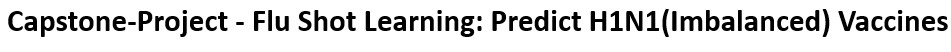

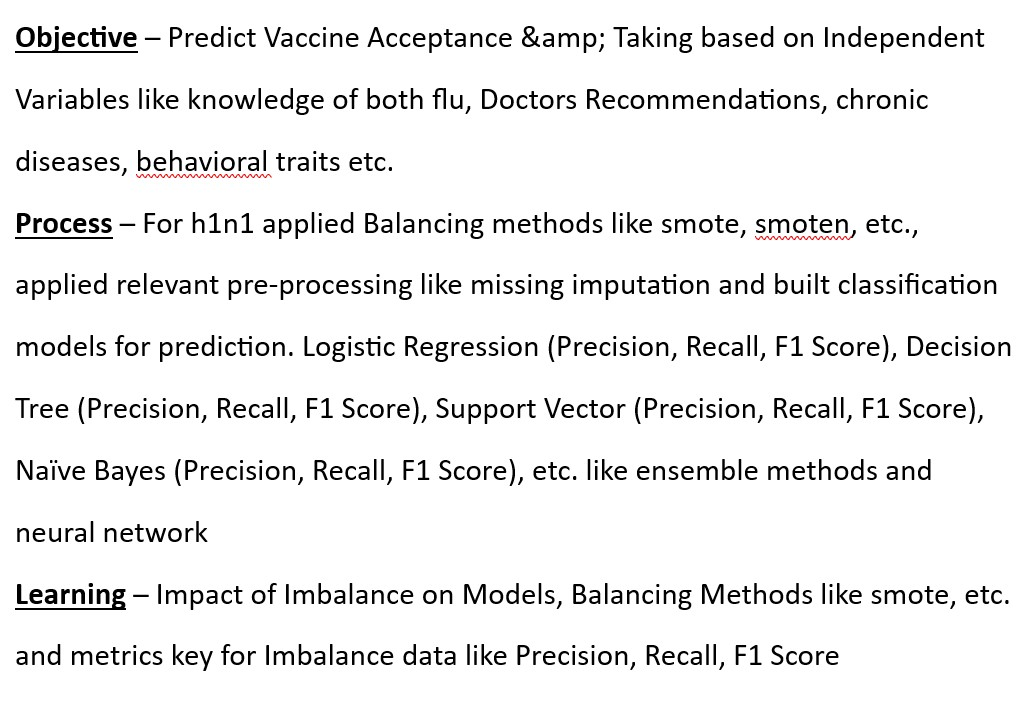

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
import io
%cd "E:\Chicago"

E:\Chicago


In [123]:
vactrainlabels=pd.read_csv("vactrainlabels.csv")

In [124]:
vactrain=pd.read_csv('vactrain.csv')

In [125]:
vactest=pd.read_csv("vactest.csv")

In [126]:
vactrainlabels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [127]:
vactrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [128]:
vactest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [129]:
vactest.isnull().sum().sort_values(ascending=False)/vactest.shape[0]

employment_occupation          0.502696
employment_industry            0.497042
health_insurance               0.457840
income_poverty                 0.168377
doctor_recc_h1n1               0.080875
doctor_recc_seasonal           0.080875
rent_or_own                    0.076232
employment_status              0.055077
marital_status                 0.053991
education                      0.052681
chronic_med_condition          0.034896
child_under_6_months           0.030440
health_worker                  0.029542
opinion_seas_sick_from_vacc    0.019507
opinion_seas_risk              0.018684
opinion_seas_vacc_effective    0.016924
opinion_h1n1_vacc_effective    0.014902
opinion_h1n1_risk              0.014228
opinion_h1n1_sick_from_vacc    0.014041
household_children             0.008424
household_adults               0.008424
behavioral_avoidance           0.007975
behavioral_touch_face          0.004793
h1n1_knowledge                 0.004568
h1n1_concern                   0.003183


In [130]:
print(vactrain.shape)
print(vactest.shape)
print(vactrainlabels.shape)

(26707, 36)
(26708, 36)
(26707, 3)


In [131]:
# Algorithm based missing values imputation - considers the impact of other variables on the 
# missing value and impute accordingly

# MICE - Multivariate imputation using chained equations simultaneously impute both numeric & non numeric missing values

# Initially imputed with mean, Median or mode and chained equation are built

# Chained equations where in the missing value column/variable is treated as dependent variable and relevant classification

# or regression model build and prediction done.

# Missing value will be replaced with predicted value.

In [132]:
combinedf=pd.concat([vactrain,vactest],axis=0)

In [133]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_mo

# Exploratory Data Analysis using vaccinetrain_df


<Axes: ylabel='sex'>

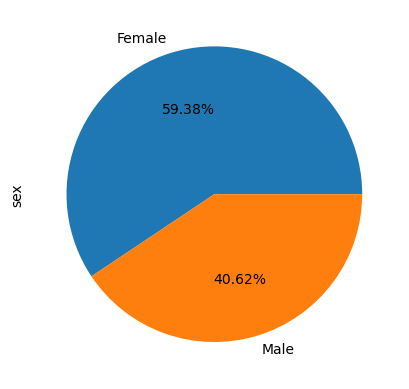

In [134]:
vactrain.sex.value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='education'>

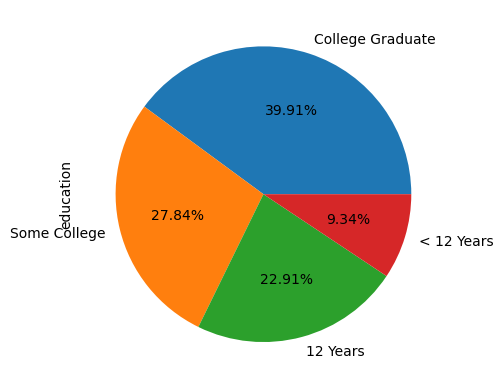

In [135]:
vactrain.education.value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='marital_status'>

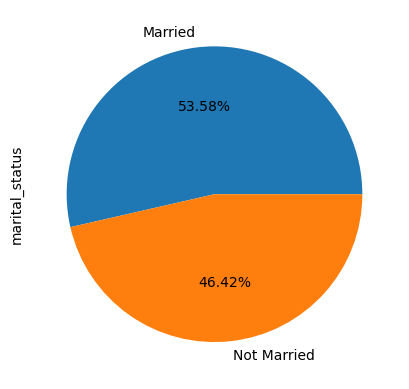

In [136]:
vactrain.marital_status.value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='health_insurance'>

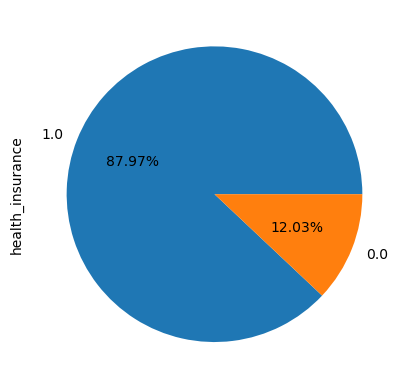

In [137]:
vactrain.health_insurance.value_counts().plot(kind='pie',autopct='%.2f%%')

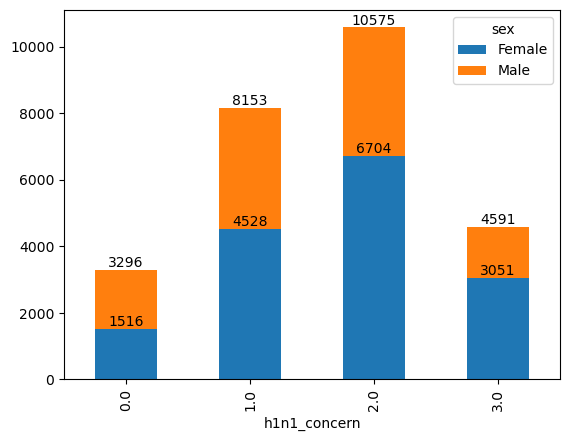

In [138]:
ax=pd.crosstab(vactrain.h1n1_concern,vactrain.sex).plot(kind='bar',stacked='True')
for i in ax.containers:
    ax.bar_label(i)

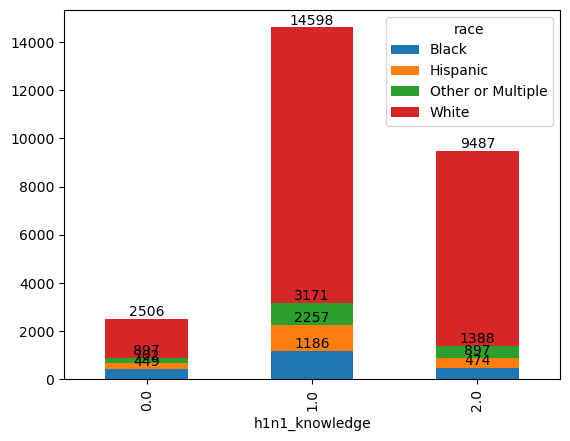

In [139]:
ax=pd.crosstab(vactrain.h1n1_knowledge,vactrain.race).plot(kind='bar',stacked='True')
for i in ax.containers:
    ax.bar_label(i)

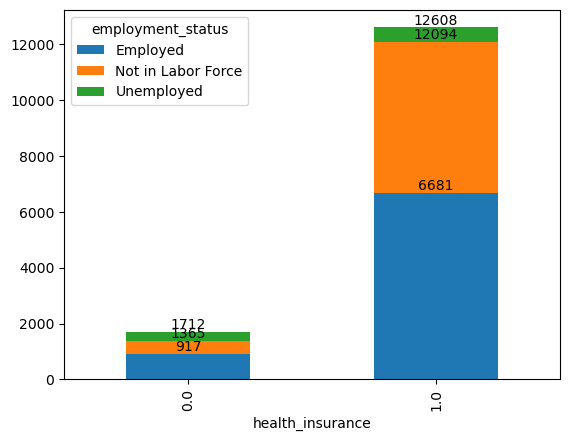

In [140]:
ax=pd.crosstab(vactrain.health_insurance,vactrain.employment_status).plot(kind='bar',stacked='True')
for i in ax.containers:
    ax.bar_label(i)

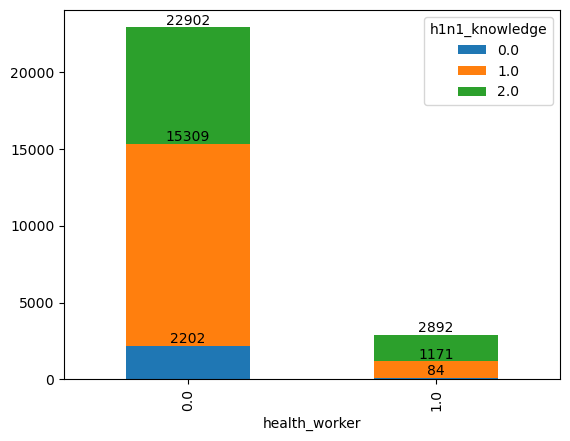

In [141]:
ax=pd.crosstab(vactrain.health_worker,vactrain.h1n1_knowledge).plot(kind='bar',stacked='True')
for i in ax.containers:
    ax.bar_label(i)

# Hypothesis Testing

In [142]:
# Test Null No Association between seasonal_vaccine & h1n1concern
pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.h1n1_concern)

h1n1_concern,0.0,1.0,2.0,3.0
seasonal_vaccine,,,,
0,2254,4811,5135,2022
1,1042,3342,5440,2569


In [143]:
from scipy.stats import chi2_contingency

In [144]:
chi2_contingency(pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.h1n1_concern))
# since pvalue is 4.102289002153701e-143 is lessthan 0.05 is reject null

Chi2ContingencyResult(statistic=661.7625859400396, pvalue=4.102289002153701e-143, dof=3, expected_freq=array([[1761.25162502, 4356.63971445, 5650.86041706, 2453.24824347],
       [1534.74837498, 3796.36028555, 4924.13958294, 2137.75175653]]))

In [145]:
# Test Null No Association between seasonal_vaccine & h1n1knowledge

In [146]:
pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.h1n1_knowledge)

h1n1_knowledge,0.0,1.0,2.0
seasonal_vaccine,,,
0,1588,8290,4334
1,918,6308,5153


In [147]:
chi2_contingency(pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.h1n1_knowledge))
# since pvalue is 2.2158145679676294e-86 is lessthan 0.05 is reject null

Chi2ContingencyResult(statistic=394.45339582163825, pvalue=2.2158145679676294e-86, dof=2, expected_freq=array([[1339.37317137, 7802.14267985, 5070.48414877],
       [1166.62682863, 6795.85732015, 4416.51585123]]))

In [148]:
# Test Null No Association between seasonal_vaccine & health_worker

In [149]:
pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.health_worker)

health_worker,0.0,1.0
seasonal_vaccine,,
0,12753,1023
1,10251,1876


In [150]:
chi2_contingency(pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.health_worker))
# since pvalue is 3.969585517032047e-93 is lessthan 0.05 is reject null

Chi2ContingencyResult(statistic=419.02923573796994, pvalue=3.969585517032047e-93, dof=1, expected_freq=array([[12234.2239895,  1541.7760105],
       [10769.7760105,  1357.2239895]]))

In [151]:
# Test Null No Association between seasonal_vaccine & sex

In [152]:
pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.sex)

sex,Female,Male
seasonal_vaccine,,
0,7970,6302
1,7888,4547


In [153]:
chi2_contingency(pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.sex))
# since pvalue is 2.5248076319253385e-36 is lessthan 0.05 is reject null

Chi2ContingencyResult(statistic=158.40462897107128, pvalue=2.5248076319253385e-36, dof=1, expected_freq=array([[8474.38409406, 5797.61590594],
       [7383.61590594, 5051.38409406]]))

In [154]:
# Test Null No Association between seasonal_vaccine & employment_status

In [155]:
pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.employment_status)

employment_status,Employed,Not in Labor Force,Unemployed
seasonal_vaccine,,,
0,7839,4523,1014
1,5721,5708,439


In [156]:
chi2_contingency(pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.employment_status))
# since pvalue is 1.0933141469852619e-132 is lessthan 0.05 is reject null

Chi2ContingencyResult(statistic=607.7040373802583, pvalue=1.0933141469852619e-132, dof=2, expected_freq=array([[7185.01663762, 5421.08445571,  769.89890667],
       [6374.98336238, 4809.91554429,  683.10109333]]))

In [157]:
# Test Null No Association between seasonal_vaccine & education

In [158]:
pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.education)

education,12 Years,< 12 Years,College Graduate,Some College
seasonal_vaccine,,,,
0,3199,1415,4933,3860
1,2598,948,5164,3183


In [159]:
chi2_contingency(pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.education))
# since pvalue is 1.0933141469852619e-132 is lessthan 0.05 is reject null

Chi2ContingencyResult(statistic=134.84444384720678, pvalue=4.885885372081626e-29, dof=3, expected_freq=array([[3071.95173913, 1252.20320158, 5350.61181818, 3732.23324111],
       [2725.04826087, 1110.79679842, 4746.38818182, 3310.76675889]]))

In [160]:
combinedf=combinedf.drop('respondent_id',axis=1)

In [161]:
# For using iterative Imputer in sklearn which is experimental as of now 
# 1) Remove variables or columns not needed
# 2) Labelencode all object and categorical data but retain the missing value as it is.

In [162]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [163]:
from sklearn.preprocessing import LabelEncoder

In [164]:
original=combinedf

In [165]:
mask=combinedf.isnull()

In [166]:
combinedf=combinedf.astype(str).apply(LabelEncoder().fit_transform)

In [167]:
combinedf=combinedf.where(~mask,original)

In [168]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1,0,0,0,0,0,0,1,1,0,...,2,1,0,1,8,2,0,0,NaN,NaN
1,3,2,0,1,0,1,0,1,1,0,...,2,1,1,0,1,0,0,0,13,20
2,1,1,0,1,0,0,0,0,0,NaN,...,0,1,0,0,9,0,2,0,15,22
3,1,1,0,1,0,1,1,0,0,0,...,2,1,1,1,5,1,0,0,NaN,NaN
4,2,1,0,1,0,1,1,0,1,0,...,0,0,0,0,9,0,1,0,19,5


In [169]:
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from sklearn.tree import DecisionTreeClassifier

In [170]:
imputer=IterativeImputer(estimator=DecisionTreeClassifier(),
                        initial_strategy="most_frequent",max_iter=20)

In [171]:
combinedf_impute=imputer.fit_transform(combinedf)

C:\Users\Maheshamb\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [172]:
combinedf_impute=pd.DataFrame(combinedf_impute,columns=combinedf.columns)

In [173]:
combinedf_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 53415 non-null  float64
 1   h1n1_knowledge               53415 non-null  float64
 2   behavioral_antiviral_meds    53415 non-null  float64
 3   behavioral_avoidance         53415 non-null  float64
 4   behavioral_face_mask         53415 non-null  float64
 5   behavioral_wash_hands        53415 non-null  float64
 6   behavioral_large_gatherings  53415 non-null  float64
 7   behavioral_outside_home      53415 non-null  float64
 8   behavioral_touch_face        53415 non-null  float64
 9   doctor_recc_h1n1             53415 non-null  float64
 10  doctor_recc_seasonal         53415 non-null  float64
 11  chronic_med_condition        53415 non-null  float64
 12  child_under_6_months         53415 non-null  float64
 13  health_worker   

<Axes: >

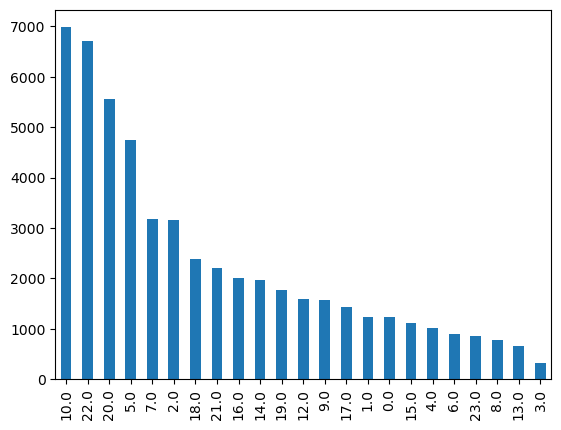

In [174]:
combinedf_impute.employment_occupation.value_counts(dropna=False).plot(kind='bar')

<Axes: >

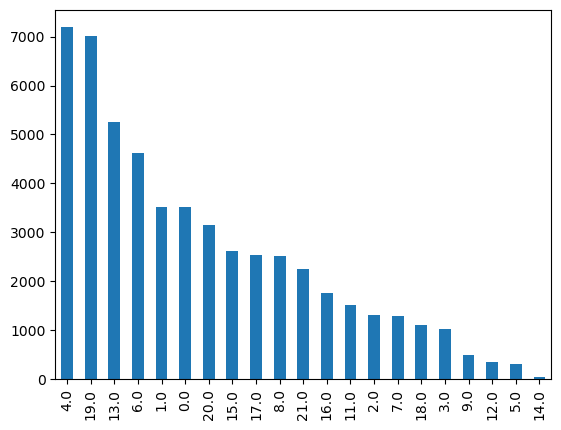

In [175]:
combinedf_impute.employment_industry.value_counts(dropna=False).plot(kind='bar')

# Splitting back the data to Train data and Test data

In [176]:
# Split data back to train & test
vac_train=combinedf_impute.loc[0:26706]

In [177]:
vac_test=combinedf_impute.loc[26707:53414]

In [178]:
print(vac_train.shape)
print(vactrain.shape)
print(vac_test.shape)
print(vactest.shape)

(26707, 35)
(26707, 36)
(26708, 35)
(26708, 36)


<Axes: >

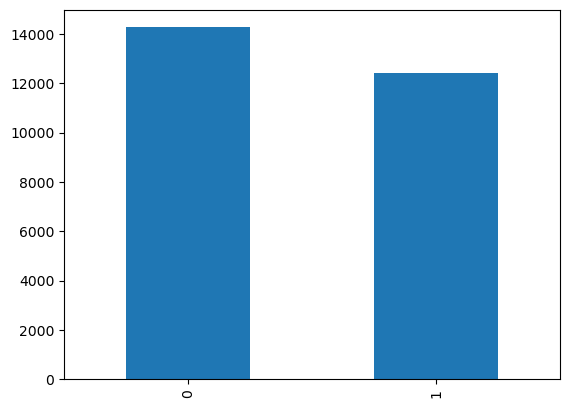

In [179]:
vactrainlabels.seasonal_vaccine.value_counts().plot(kind='bar')

<Axes: >

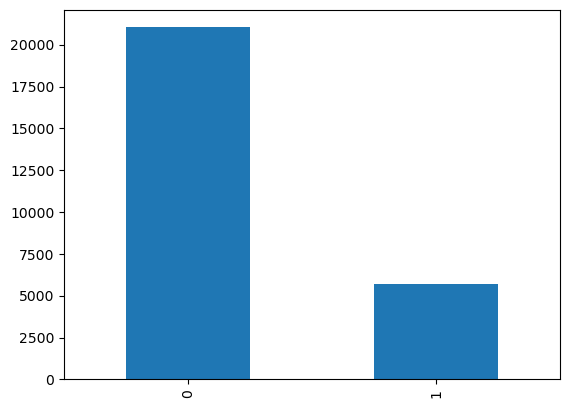

In [180]:
vactrainlabels.h1n1_vaccine.value_counts().plot(kind='bar')

In [181]:
y=vactrainlabels.h1n1_vaccine
x=vac_train

In [182]:
y=LabelEncoder().fit_transform(y)

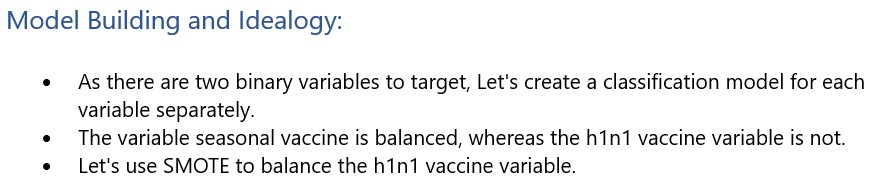

In [183]:
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Logistic Regression for H1N1 Vaccine

In [184]:
logit=LogisticRegression(max_iter=1000).fit(x,y)

In [185]:
logit.score(x,y)

0.8304189912756955

In [186]:
cross_val_score(logit,x,y)

array([0.8260951 , 0.82497192, 0.83523685, 0.83523685, 0.82868377])

In [187]:
np.mean([0.82834145, 0.82628229, 0.83430069, 0.83467515, 0.82756038])

0.8302319919999999

In [188]:
logitpredict=logit.predict(x)

In [189]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     21033
           1       0.67      0.40      0.50      5674

    accuracy                           0.83     26707
   macro avg       0.76      0.67      0.70     26707
weighted avg       0.81      0.83      0.81     26707



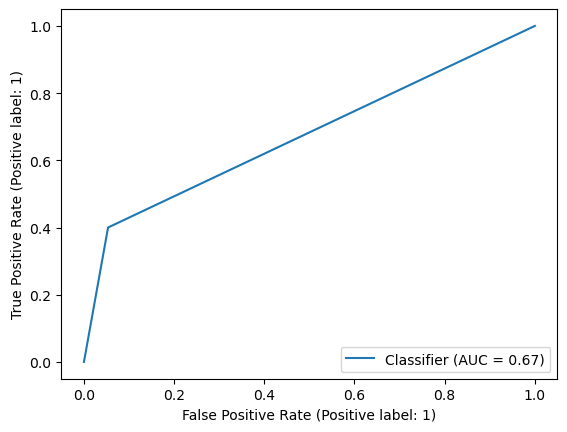

In [190]:
RocCurveDisplay.from_predictions(y,logitpredict)

# Decision Tree Classification for H1N1 Vaccine

In [191]:
from sklearn.tree import DecisionTreeClassifier

In [192]:
tree=DecisionTreeClassifier(max_depth=10)

In [193]:
treemodel=tree.fit(x,y)

In [194]:
treemodel.score(x,y)

0.8653536526004418

In [195]:
treepredict=tree.predict(x)

In [196]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     21033
           1       0.78      0.52      0.62      5674

    accuracy                           0.87     26707
   macro avg       0.83      0.74      0.77     26707
weighted avg       0.86      0.87      0.85     26707



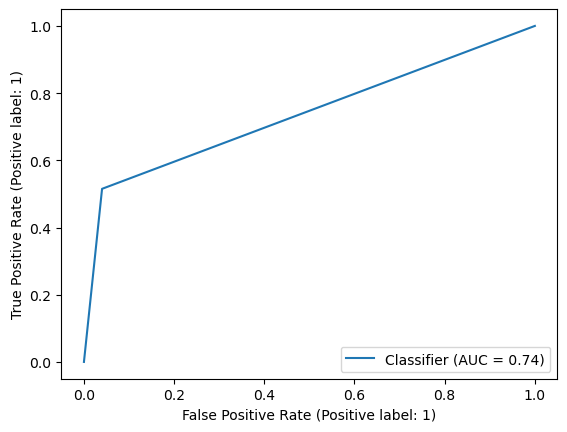

In [197]:
RocCurveDisplay.from_predictions(y,treepredict)

# Random Forest Classification for H1N1 Vaccine

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [199]:
RF=RandomForestClassifier(n_estimators=3000)

In [200]:
RFmodel=RF.fit(x,y)

In [201]:
RFmodel.score(x,y)

0.9999625566330924

In [202]:
cross_val_score(RFmodel,x,y) 

array([0.83058779, 0.82946462, 0.83523685, 0.84010485, 0.83205392])

In [203]:
np.mean([0.83171097, 0.83133658, 0.83186669, 0.83767085, 0.82943269])

0.8324035559999998

In [204]:
RFpredict=RF.predict(x)

In [205]:
print(classification_report(y,RFpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21033
           1       1.00      1.00      1.00      5674

    accuracy                           1.00     26707
   macro avg       1.00      1.00      1.00     26707
weighted avg       1.00      1.00      1.00     26707



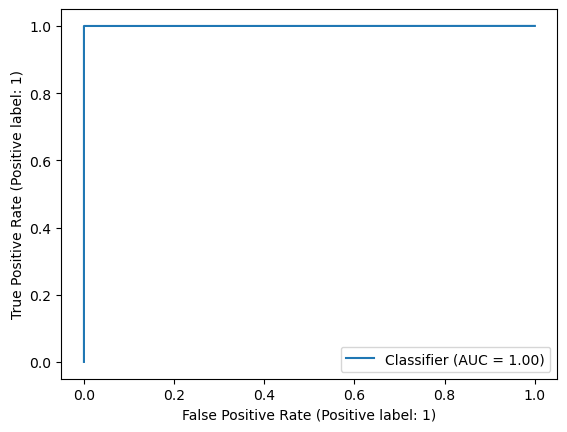

In [206]:
RocCurveDisplay.from_predictions(y,RFpredict)

# Gradient Boosting Classification for H1N1 Vaccine

In [207]:
from sklearn.ensemble import GradientBoostingClassifier

In [208]:
GB=GradientBoostingClassifier(n_estimators=3000)

In [209]:
GBModel=GB.fit(x,y)

In [210]:
GBModel.score(x,y)

0.8856479574643352

In [211]:
cross_val_score(GBModel,x,y) 

array([0.82515912, 0.82366155, 0.82756038, 0.831305  , 0.82419023])

In [212]:
np.mean([0.82965182, 0.82628229, 0.82681146, 0.83430069, 0.81801161])

0.8270115739999999

In [213]:
GBpredict=GB.predict(x)

In [214]:
print(classification_report(y,GBpredict))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     21033
           1       0.82      0.59      0.69      5674

    accuracy                           0.89     26707
   macro avg       0.86      0.78      0.81     26707
weighted avg       0.88      0.89      0.88     26707



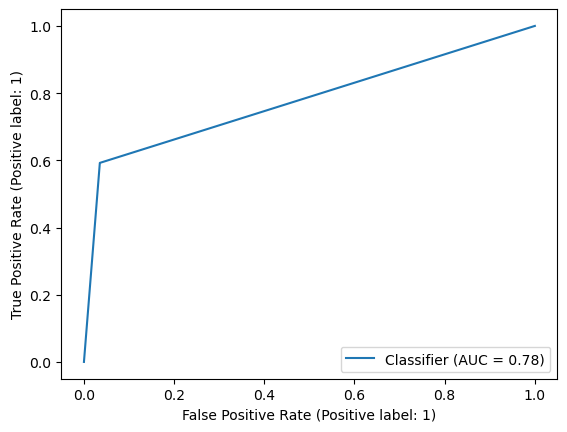

In [215]:
RocCurveDisplay.from_predictions(y,GBpredict)

# Support Vector Classification for H1N1 Vaccine

In [216]:
from sklearn.svm import SVC

In [217]:
svm = SVC()

In [218]:
svmmodel = svm.fit(x,y)

In [219]:
svmmodel.score(x,y)

0.8181001235631108

In [220]:
cross_val_score(svmmodel,x,y)

array([0.81299139, 0.81448896, 0.81576484, 0.81445422, 0.81595207])

In [221]:
np.mean([0.81430176, 0.81448896, 0.81688822, 0.81707545, 0.81819884])

0.8161906460000001

In [222]:
svmpredict = svmmodel.predict(x)

In [223]:
print(classification_report(y,svmpredict))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     21033
           1       0.74      0.22      0.34      5674

    accuracy                           0.82     26707
   macro avg       0.78      0.60      0.62     26707
weighted avg       0.81      0.82      0.78     26707



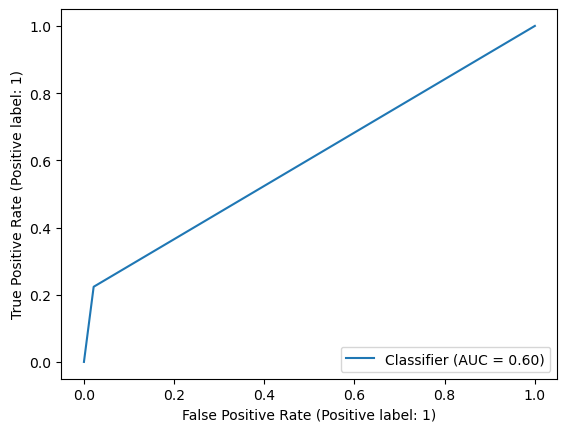

In [224]:
RocCurveDisplay.from_predictions(y,svmpredict)

# Naive Bayes Classification for H1N1 Vaccine

In [225]:
from sklearn.naive_bayes import BernoulliNB

In [226]:
nb=BernoulliNB()

In [227]:
nbmodel=nb.fit(x,y)

In [228]:
nbmodel.score(x,y)

0.7950724529149661

In [229]:
nbpredict=nbmodel.predict(x)

In [230]:
pd.crosstab(y,nbpredict)

col_0,0,1
row_0,,
0,18569,2464
1,3009,2665


In [231]:
cross_val_score(nb,x,y)

array([0.79183826, 0.7901535 , 0.8009736 , 0.80022468, 0.79048867])

In [232]:
np.mean([0.69468364, 0.71827031, 0.70436248, 0.71615802, 0.70043063])


0.706781016

In [233]:
print(classification_report(y,nbpredict))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     21033
           1       0.52      0.47      0.49      5674

    accuracy                           0.80     26707
   macro avg       0.69      0.68      0.68     26707
weighted avg       0.79      0.80      0.79     26707



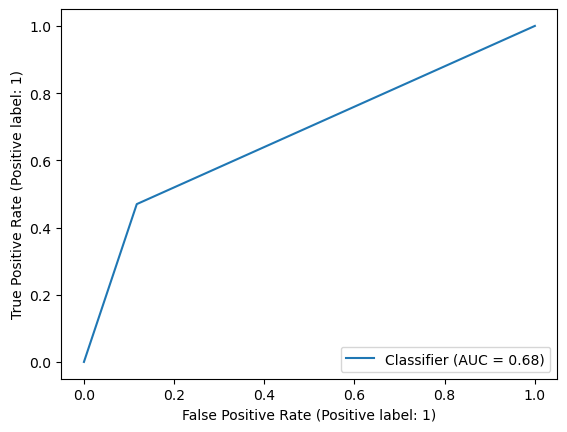

In [234]:
RocCurveDisplay.from_predictions(y,nbpredict)

# KNN Classification for H1N1 Vaccine

In [235]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [236]:
knn=KNeighborsClassifier()

In [237]:
k_range=list(range(1,25))
param_grid=dict(n_neighbors=k_range)
grid=GridSearchCV(knn,param_grid,cv=3)

In [238]:
grid_search=grid.fit(x,y)

In [239]:
grid_search.score(x,y)

0.8198599618077658

In [240]:
grid_search.best_params_

{'n_neighbors': 19}

In [241]:
grid_search.best_score_

0.8057812721293938

In [242]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=19)

In [243]:
knn_predict=grid_search.predict(x)

In [244]:
pd.crosstab(y,knn_predict)

col_0,0,1
row_0,,
0,20427,606
1,4205,1469


In [245]:
print(classification_report(y,knn_predict))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89     21033
           1       0.71      0.26      0.38      5674

    accuracy                           0.82     26707
   macro avg       0.77      0.62      0.64     26707
weighted avg       0.80      0.82      0.79     26707



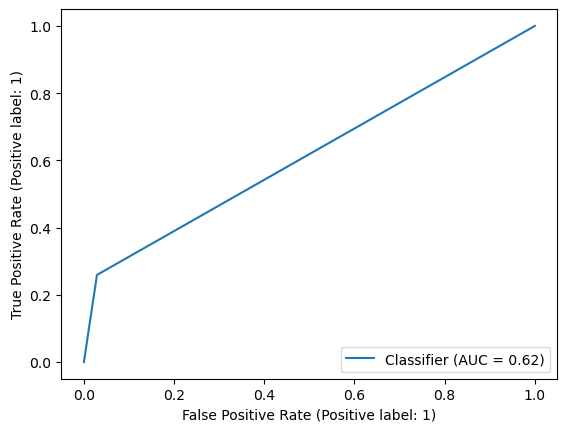

In [246]:
RocCurveDisplay.from_predictions(y,knn_predict)

# Balancing the Imbalance Data using Smote

In [247]:
# SMOTE - Synthetic minority OverSampling Technique
# SMOTE - Uses KNN Algorithm(Ecludien Distance) and creates artificial or Synthetic data that lies within Range.

# No Outliers are created
# SMOTE also uses Random number generator for generating random weights between 0 and 1

# Two Independent Variables - x1 - Income and x2 - Age 
# X1 - 2400,2500,2700,2300,2100
# X2 - 46, 34, 45, 28, 25, 41
# Choose a randomly selected weight between 0 and 1. Randomly selected 0.60
# 2500 +0.60*(2400-2500)= 2440 (synthetic Data Point)
# 34 +0.60*(46-34) = 41.20 or 41 (Synthetic Data Point)

# SMOTE - Works only on Numeric Data
# SMOTENC - For Both Numeric and Non Numeric Categorical Data
# SMOTEN - only for Non Numeric Categorical Data

In [248]:
from imblearn.over_sampling import SMOTEN

In [249]:
smote=SMOTEN(random_state=42)

In [250]:
x_smote,y_smote=smote.fit_resample(x,y)

In [251]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_smote).value_counts())

0    21033
1     5674
dtype: int64
0    21033
1    21033
dtype: int64


# Logistic Regression,Decision Tree,Random Forest,Gradient Boosting,Support Vector,Naiv Bayes,KNN Classifiers:

In [252]:
logit_smote=LogisticRegression(max_iter=1000)

In [253]:
logit_smote_model=logit_smote.fit(x_smote,y_smote)

In [254]:
logit_smote_model.score(x_smote,y_smote)

0.8076356202158513

In [255]:
cross_val_score(logit_smote_model,x_smote,y_smote)

array([0.67672926, 0.79020563, 0.83323428, 0.84476406, 0.84119815])

In [349]:
np.mean([0.67672926, 0.79020563, 0.83323428, 0.84476406, 0.84119815])

0.7972262760000001

In [257]:
logit_smote_pred=logit_smote_model.predict(x_smote)

In [258]:
print(classification_report(y_smote,logit_smote_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     21033
           1       0.81      0.80      0.81     21033

    accuracy                           0.81     42066
   macro avg       0.81      0.81      0.81     42066
weighted avg       0.81      0.81      0.81     42066



In [259]:
pd.crosstab(y_smote,logit_smote_pred)

col_0,0,1
row_0,,
0,17227,3806
1,4286,16747


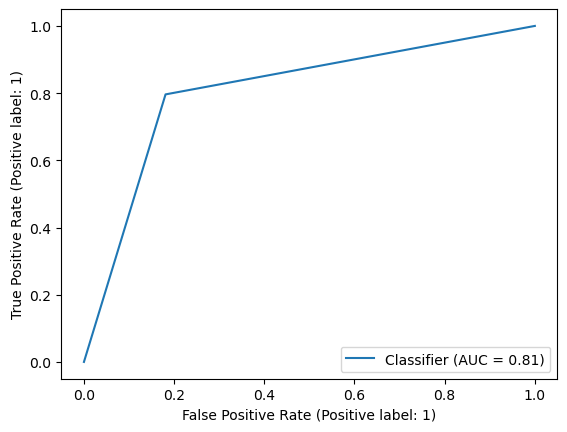

In [260]:
RocCurveDisplay.from_predictions(y_smote,logit_smote_pred)

In [261]:
tree_smote=DecisionTreeClassifier(max_depth=10)

In [262]:
tree_smote_model=tree_smote.fit(x_smote,y_smote)

In [263]:
tree_smote_model.score(x_smote,y_smote)

0.8484762040602862

In [264]:
cross_val_score(tree_smote_model,x_smote,y_smote)

array([0.66199192, 0.78497563, 0.83739451, 0.83786996, 0.84096042])

In [348]:
np.mean([0.66199192, 0.78497563, 0.83739451, 0.83786996, 0.84096042])

0.792638488

In [266]:
tree_smote_pred=tree_smote_model.predict(x_smote)

In [267]:
print(classification_report(y_smote,tree_smote_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85     21033
           1       0.84      0.86      0.85     21033

    accuracy                           0.85     42066
   macro avg       0.85      0.85      0.85     42066
weighted avg       0.85      0.85      0.85     42066



In [268]:
pd.crosstab(y_smote,tree_smote_pred)

col_0,0,1
row_0,,
0,17705,3328
1,3046,17987


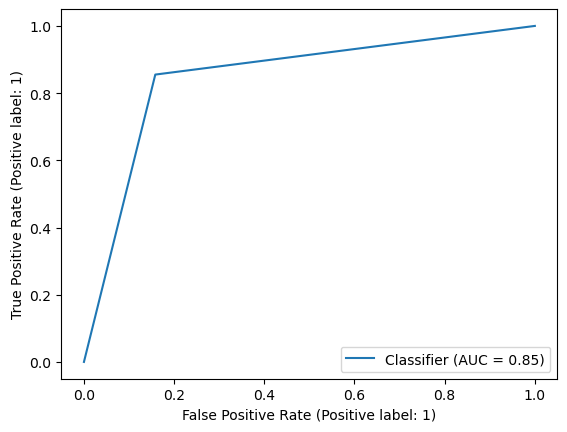

In [269]:
RocCurveDisplay.from_predictions(y_smote,tree_smote_pred)

In [270]:
RF_smote=RandomForestClassifier(n_estimators=3000)

In [271]:
RF_smote_model=RF_smote.fit(x_smote,y_smote)

In [272]:
RF_smote_model.score(x_smote,y_smote)

0.9999762278324538

In [273]:
cross_val_score(RF_smote_model,x_smote,y_smote)

array([0.65771333, 0.86615952, 0.94092476, 0.94496612, 0.94021158])

In [347]:
np.mean([0.65771333, 0.86615952, 0.94092476, 0.94496612, 0.94021158])

0.8699950620000001

In [275]:
RF_smote_pred=RF_smote_model.predict(x_smote)

In [276]:
print(classification_report(y_smote,RF_smote_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21033
           1       1.00      1.00      1.00     21033

    accuracy                           1.00     42066
   macro avg       1.00      1.00      1.00     42066
weighted avg       1.00      1.00      1.00     42066



In [277]:
pd.crosstab(y_smote,RF_smote_pred)

col_0,0,1
row_0,,
0,21033,0
1,1,21032


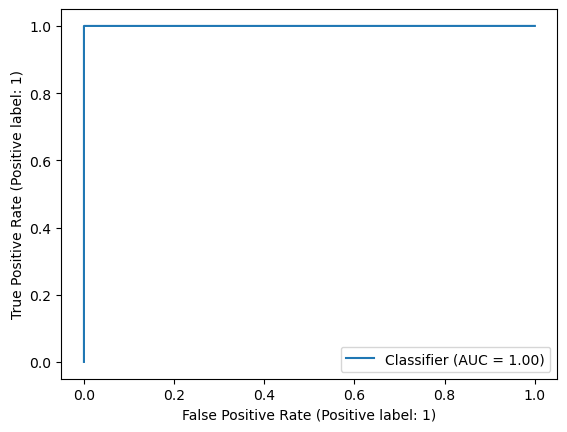

In [278]:
RocCurveDisplay.from_predictions(y_smote,RF_smote_pred)

In [279]:
GB_smote=GradientBoostingClassifier(n_estimators=3000)

In [280]:
GB_smote_model=GB_smote.fit(x_smote,y_smote)

In [281]:
GB_smote_model.score(x_smote,y_smote)

0.8985879332477535

In [282]:
cross_val_score(GB_smote_model,x_smote,y_smote)

array([0.66115997, 0.84155474, 0.90895043, 0.90978248, 0.90871271])

In [346]:
np.mean([0.66115997, 0.84155474, 0.90895043, 0.90978248, 0.90871271])

0.846032066

In [284]:
GB_smote_pred=GB_smote_model.predict(x_smote)

In [285]:
print(classification_report(y_smote,GB_smote_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     21033
           1       0.90      0.90      0.90     21033

    accuracy                           0.90     42066
   macro avg       0.90      0.90      0.90     42066
weighted avg       0.90      0.90      0.90     42066



In [286]:
pd.crosstab(y_smote,GB_smote_pred)

col_0,0,1
row_0,,
0,18936,2097
1,2169,18864


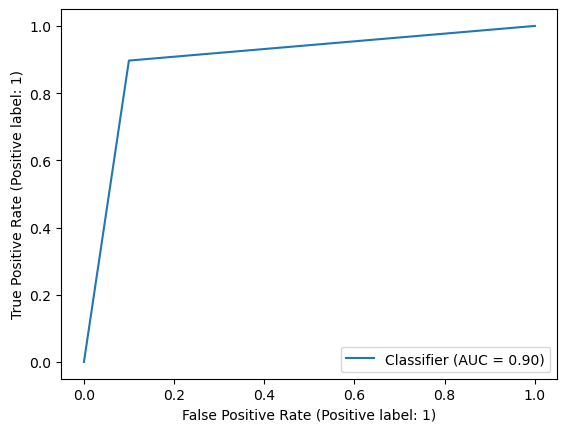

In [287]:
RocCurveDisplay.from_predictions(y_smote,GB_smote_pred)

In [288]:
svm_smote_model = svm.fit(x_smote,y_smote)

In [289]:
svm_smote_model.score(x_smote,y_smote)

0.8224694527647031

In [290]:
cross_val_score(svm_smote_model,x_smote,y_smote)

array([0.67494652, 0.80137882, 0.84000951, 0.85177701, 0.85201474])

In [343]:
np.mean([0.67494652, 0.80137882, 0.84000951, 0.85177701, 0.85201474])

0.8040253199999998

In [292]:
svm_smote_pred = svm_smote_model.predict(x_smote)

In [293]:
print(classification_report(y_smote,svm_smote_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83     21033
           1       0.83      0.81      0.82     21033

    accuracy                           0.82     42066
   macro avg       0.82      0.82      0.82     42066
weighted avg       0.82      0.82      0.82     42066



In [294]:
pd.crosstab(y_smote,svm_smote_pred)

col_0,0,1
row_0,,
0,17617,3416
1,4052,16981


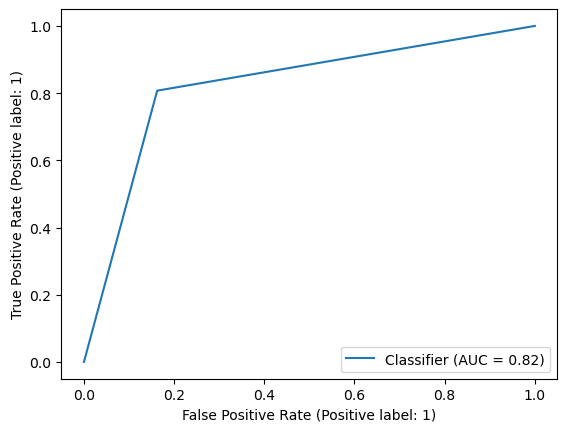

In [295]:
RocCurveDisplay.from_predictions(y_smote,svm_smote_pred)

In [296]:
nb_smote_model = nb.fit(x_smote,y_smote)

In [297]:
nb_smote_model.score(x_smote,y_smote)

0.761636476013883

In [298]:
cross_val_score(nb_smote_model,x_smote,y_smote)

array([0.64594723, 0.74384881, 0.79389041, 0.79329609, 0.79079995])

In [344]:
np.mean([0.64594723, 0.74384881, 0.79389041, 0.79329609, 0.79079995])

0.753556498

In [300]:
nb_smote_pred=nb_smote_model.predict(x_smote)

In [301]:
print(classification_report(y_smote,nb_smote_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76     21033
           1       0.75      0.78      0.77     21033

    accuracy                           0.76     42066
   macro avg       0.76      0.76      0.76     42066
weighted avg       0.76      0.76      0.76     42066



In [302]:
pd.crosstab(y_smote,nb_smote_pred)

col_0,0,1
row_0,,
0,15648,5385
1,4642,16391


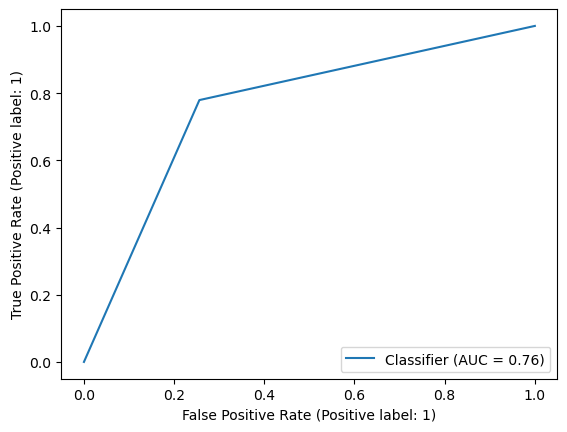

In [303]:
RocCurveDisplay.from_predictions(y_smote,nb_smote_pred)

In [304]:
knn_smote_model = knn.fit(x_smote,y_smote)

In [305]:
knn_smote_model.score(x_smote,y_smote)

0.858294109256882

In [306]:
cross_val_score(knn_smote_model,x_smote,y_smote)

array([0.66781555, 0.77130631, 0.8259836 , 0.83323428, 0.82788542])

In [345]:
np.mean([0.66781555, 0.77130631, 0.8259836 , 0.83323428, 0.82788542])

0.785245032

In [308]:
knn_smote_pred=knn_smote_model.predict(x_smote)

In [309]:
print(classification_report(y_smote,knn_smote_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85     21033
           1       0.83      0.90      0.86     21033

    accuracy                           0.86     42066
   macro avg       0.86      0.86      0.86     42066
weighted avg       0.86      0.86      0.86     42066



In [310]:
pd.crosstab(y_smote,knn_smote_pred)

col_0,0,1
row_0,,
0,17104,3929
1,2032,19001


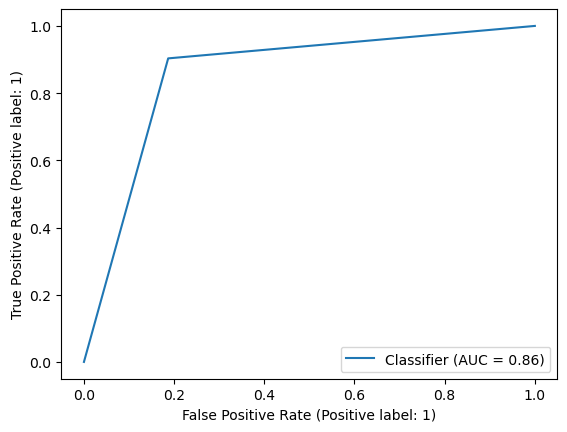

In [311]:
RocCurveDisplay.from_predictions(y_smote,knn_smote_pred)

In [312]:
# Imbalance Data is a problem in Classification Both in binary and multinomial

# majority class will be more than 70% and minority class is less than 30%
# model performance will be severely effected.

# In Imbalance Data classification Accuracy of the model will be good but
# sensitivity/Recall, Precision and F1 Score of minority class is worst.
# Even AUC will be bad for Imbalance Data model
# classification report must be checked in case of Imbalance Data

# Dealing with Imbalance Data - Sampling methods must be used. oversampling and undersampling

# 1) Random over sampling is where observations from minority class are duplicated.

# 2)  Random under sampling is where observations from majority class are deleted.

# Undersampling is used when there is Large scale Data

# Oversampling is used when data size is small scale data

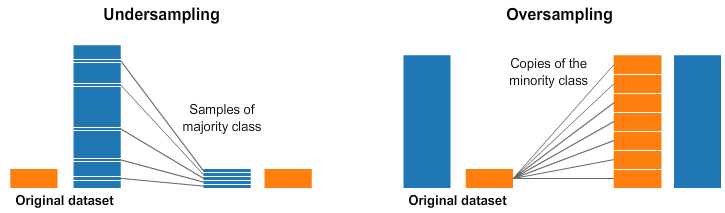

In [313]:
from imblearn.under_sampling import RandomUnderSampler

In [314]:
rus=RandomUnderSampler(random_state=42)

In [315]:
x_rus,y_rus=rus.fit_resample(x,y)

In [316]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_rus).value_counts())


0    21033
1     5674
dtype: int64
0    5674
1    5674
dtype: int64


In [317]:
logit_rus=LogisticRegression(max_iter=1000)

In [318]:
logit_rus_model=logit_rus.fit(x_rus,y_rus)

In [319]:
logit_rus_model.score(x_rus,y_rus)

0.7584596404652802

In [320]:
logit_rus_pred=logit_rus_model.predict(x_rus)

In [321]:
print(classification_report(y_rus,logit_rus_pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76      5674
           1       0.77      0.73      0.75      5674

    accuracy                           0.76     11348
   macro avg       0.76      0.76      0.76     11348
weighted avg       0.76      0.76      0.76     11348



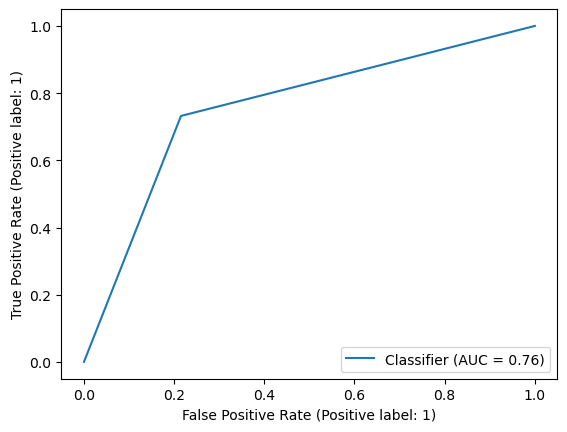

In [322]:
RocCurveDisplay.from_predictions(y_rus,logit_rus_pred)

In [323]:
from imblearn.over_sampling import RandomOverSampler

In [324]:
ros=RandomOverSampler(random_state=42)

In [325]:
x_ros,y_ros=ros.fit_resample(x,y)

In [326]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_ros).value_counts())

0    21033
1     5674
dtype: int64
0    21033
1    21033
dtype: int64


In [327]:
logit_ros=LogisticRegression(max_iter=1000)

In [328]:
logit_ros_model=logit_ros.fit(x_ros,y_ros)

In [329]:
logit_ros_model.score(x_ros,y_ros)

0.7559787001378786

In [330]:
logit_ros_pred=logit_ros_model.predict(x_ros)

In [331]:
print(classification_report(y_ros,logit_ros_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     21033
           1       0.77      0.73      0.75     21033

    accuracy                           0.76     42066
   macro avg       0.76      0.76      0.76     42066
weighted avg       0.76      0.76      0.76     42066



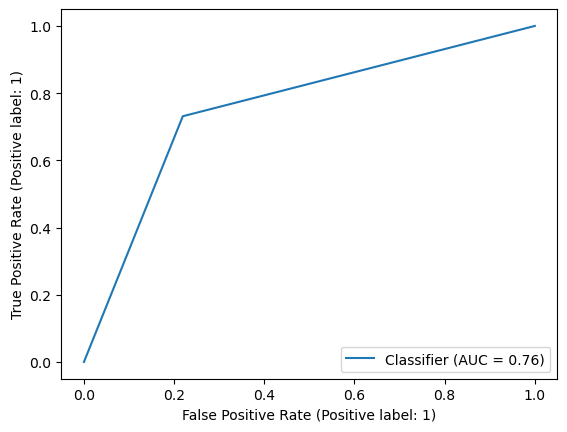

In [332]:
RocCurveDisplay.from_predictions(y_ros,logit_ros_pred)

# Undersampling Technique - Tomek links are pairs of observations of 
# Opposite classes in class vicinity.
# In this algorithm, majority class observations are deleted from the tomek Link,
# Which provides a better decision for a classifier.

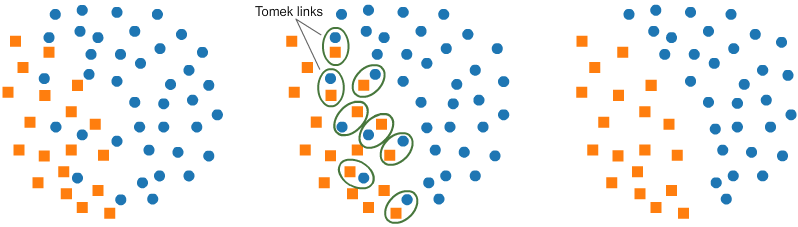

In [333]:
from imblearn.under_sampling import TomekLinks

In [334]:
tomeklinks=TomekLinks(sampling_strategy='majority')

In [335]:
x_tomeklinks,y_tomeklinks=tomeklinks.fit_resample(x,y)

In [336]:
pd.DataFrame(y_tomeklinks).value_counts()

0    19801
1     5674
dtype: int64

In [337]:
logit_tomek=LogisticRegression(max_iter=1000)

In [338]:
logit_tomek_model=logit_tomek.fit(x_tomeklinks,y_tomeklinks)

In [339]:
logit_tomek_model.score(x_tomeklinks,y_tomeklinks)

0.8312463199214917

In [340]:
logit_tomek_pred=logit_tomek_model.predict(x_tomeklinks)

In [341]:
print(classification_report(y_tomeklinks,logit_tomek_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90     19801
           1       0.69      0.44      0.54      5674

    accuracy                           0.83     25475
   macro avg       0.77      0.69      0.72     25475
weighted avg       0.82      0.83      0.82     25475



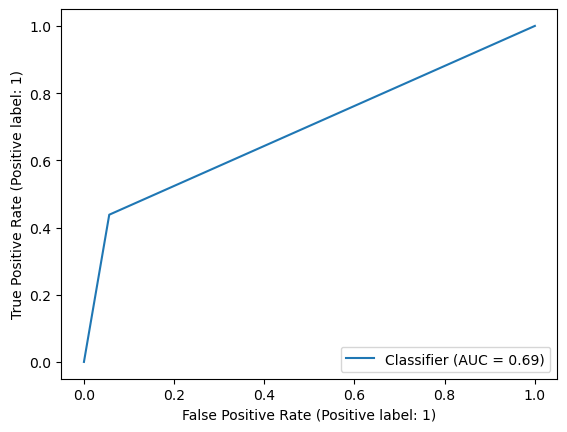

In [342]:
RocCurveDisplay.from_predictions(y_tomeklinks,logit_tomek_pred)

# Performance Metric Report:

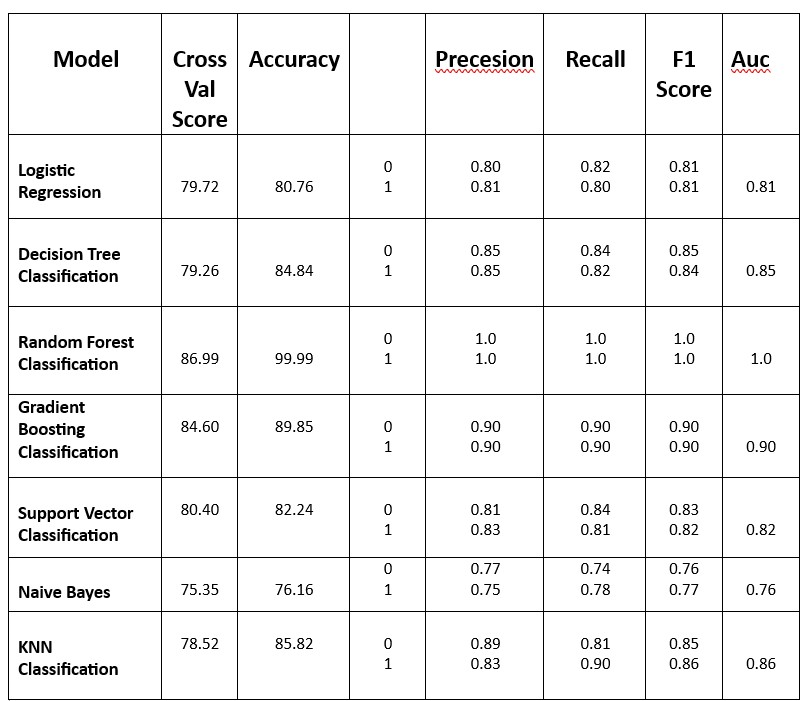

# Conclusion

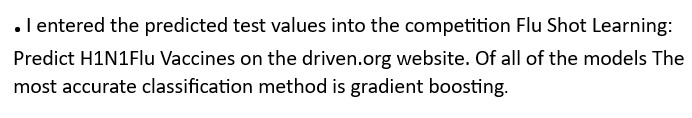